In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import re
from matplotlib import pyplot as plt
from IPython.display import display
SRC_PATH="parsed"

In [2]:
def load_housing_data(src=SRC_PATH):
    csv_path = os.path.join(src, "src.csv")
    return pd.read_csv(csv_path)

In [3]:
df = load_housing_data()
df.head()

,Title,Links,Categories,Images,References,Length,Quality,Theme
0,Hammurabi,1103,45,44,97,15484,4.0,People
1,Hatshepsut,755,49,18,97,33266,3.0,People
2,Ramesses II,662,43,25,119,32507,2.0,People
3,Cyrus the Great,515,61,32,213,47616,2.0,People
4,Alexander the Great,1910,71,75,401,89053,4.0,People


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       998 non-null    object 
 1   Links       998 non-null    int64  
 2   Categories  998 non-null    int64  
 3   Images      998 non-null    int64  
 4   References  998 non-null    int64  
 5   Length      998 non-null    int64  
 6   Quality     997 non-null    float64
 7   Theme       998 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 62.5+ KB


In [5]:
df["Theme"].value_counts()

Science                         210
Society and social sciences     146
People                          112
Geography                       106
Technology                       98
History                          83
Everyday life                    57
Philosophy and religion          55
Arts                             45
Mathematics                      45
Health, medicine and disease     41
Name: Theme, dtype: int64

In [6]:
df.describe()

,Links,Categories,Images,References,Length,Quality
count,998.000000,998.000000,998.000000,998.000000,998.000000,997.000000
mean,859.871743,38.109218,41.362725,218.013026,50315.901804,2.749248
std,513.129578,25.571013,37.425723,181.221618,25837.048931,0.959685
min,99.000000,7.000000,2.000000,6.000000,7047.000000,1.000000
25%,477.000000,21.000000,21.000000,86.000000,30272.000000,2.000000
50%,733.000000,30.000000,31.000000,157.000000,46976.500000,3.000000
75%,1140.750000,44.000000,48.750000,297.750000,63421.500000,3.000000
max,3662.000000,153.000000,339.000000,1310.000000,165877.000000,5.000000


In [7]:
corr_matrix = df.corr()

C:\Users\Peter\AppData\Local\Temp\ipykernel_19140\1437168467.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<AxesSubplot: >

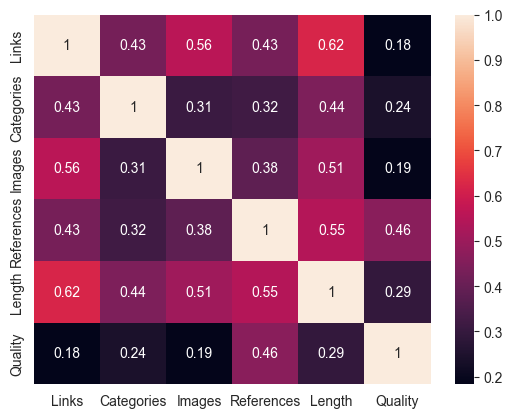

In [8]:
sns.heatmap(corr_matrix, annot=True)

In [9]:
# Alternative way of filtering
# df_filtered = df[df["Theme"] == "Arts"]

df_filtered_just_arts = df.query("Theme == 'Arts'")
df_filtered_just_arts.head()

,Title,Links,Categories,Images,References,Length,Quality,Theme
301,The arts,1055,23,33,83,21772,2.0,Arts
302,Art,519,30,36,256,57072,2.0,Arts
303,Prehistoric art,849,12,46,80,50775,2.0,Arts
304,Fashion,1548,31,26,104,54418,2.0,Arts
305,Museum,441,29,30,131,44326,2.0,Arts


In [10]:
categories = sorted(set(df['Theme']))

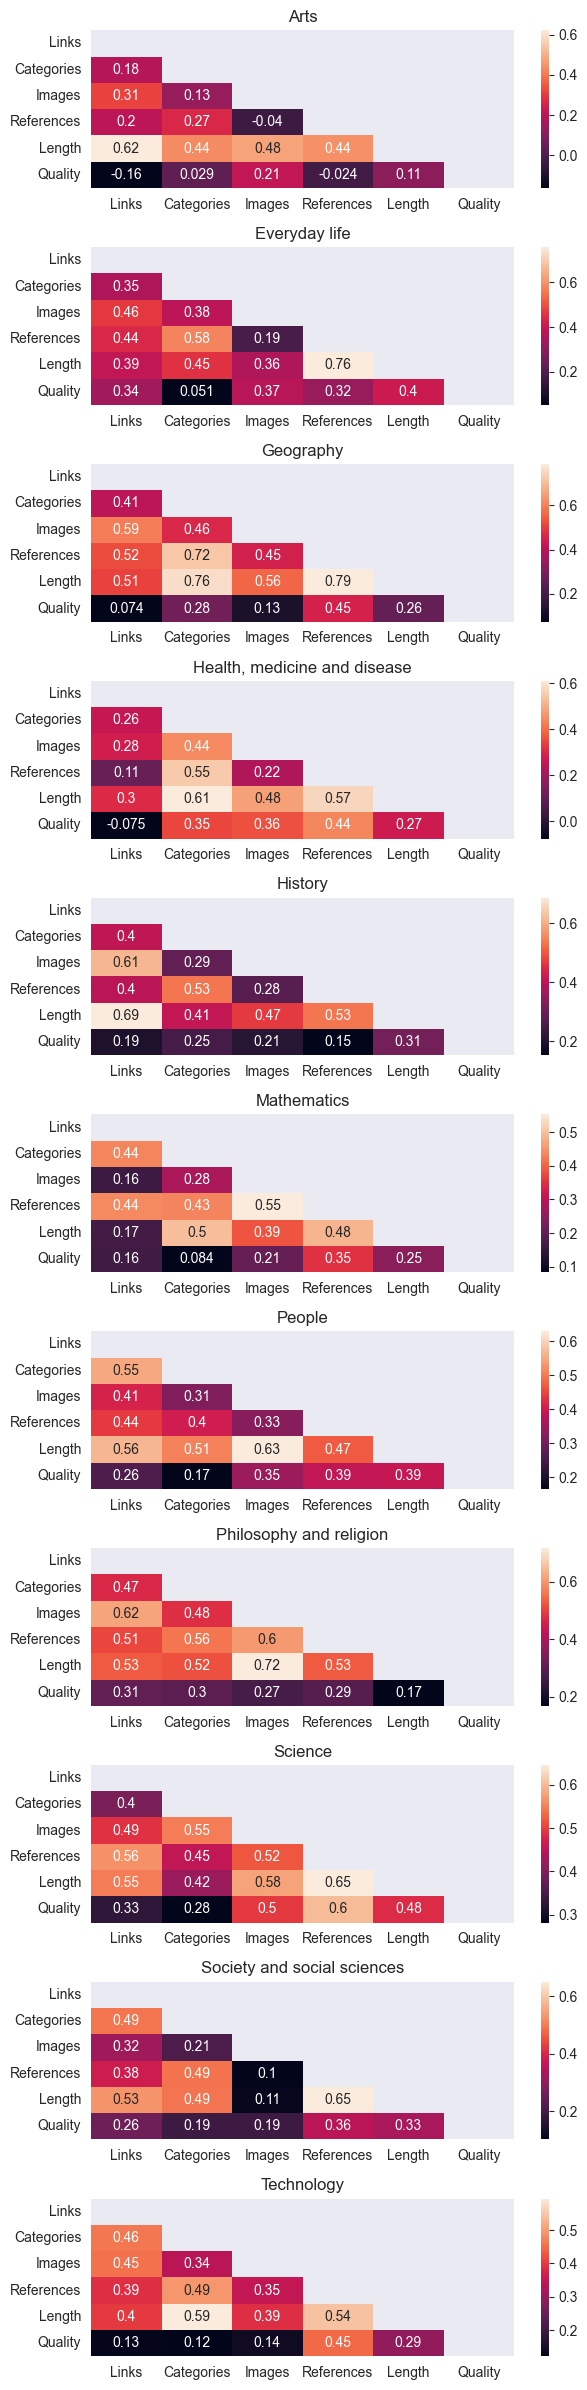

In [11]:
def corr_for_category(category):
    df_filtered = df.query(f"Theme == '{category}'")
    corr_within_category = df_filtered.corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr_within_category, dtype=bool))
    ax[i].set_title(category)
    sns.heatmap(corr_within_category, mask=mask, annot=True, ax=ax[i])

length = len(categories)
fig, ax = plt.subplots(length,1, figsize=(6.4, 24))
i = 0

# plt.figure(figsize=(6.4, 24))
for category in categories:
    corr_for_category(category)
    i+=1

plt.tight_layout()

In [12]:
# Science subset w every attribute
df_science = df.query("Theme == 'Science'")
df_science.head()

,Title,Links,Categories,Images,References,Length,Quality,Theme
645,Science,661,32,29,416,45955,3.0,Science
646,Scientific method,769,17,21,151,73762,3.0,Science
647,Measurement,304,16,10,38,20674,2.0,Science
648,International System of Units,681,31,19,195,58608,4.0,Science
649,Nature,746,22,59,207,37866,4.0,Science


In [13]:
df_arts_without_quality = df.query("Theme == 'Arts'")
df_arts_without_quality.drop(columns=["Quality"])
df_arts_without_quality.head()

,Title,Links,Categories,Images,References,Length,Quality,Theme
301,The arts,1055,23,33,83,21772,2.0,Arts
302,Art,519,30,36,256,57072,2.0,Arts
303,Prehistoric art,849,12,46,80,50775,2.0,Arts
304,Fashion,1548,31,26,104,54418,2.0,Arts
305,Museum,441,29,30,131,44326,2.0,Arts


In [14]:
df_without_quality = df.drop(columns=["Quality"])
df_without_quality.head()

,Title,Links,Categories,Images,References,Length,Theme
0,Hammurabi,1103,45,44,97,15484,People
1,Hatshepsut,755,49,18,97,33266,People
2,Ramesses II,662,43,25,119,32507,People
3,Cyrus the Great,515,61,32,213,47616,People
4,Alexander the Great,1910,71,75,401,89053,People


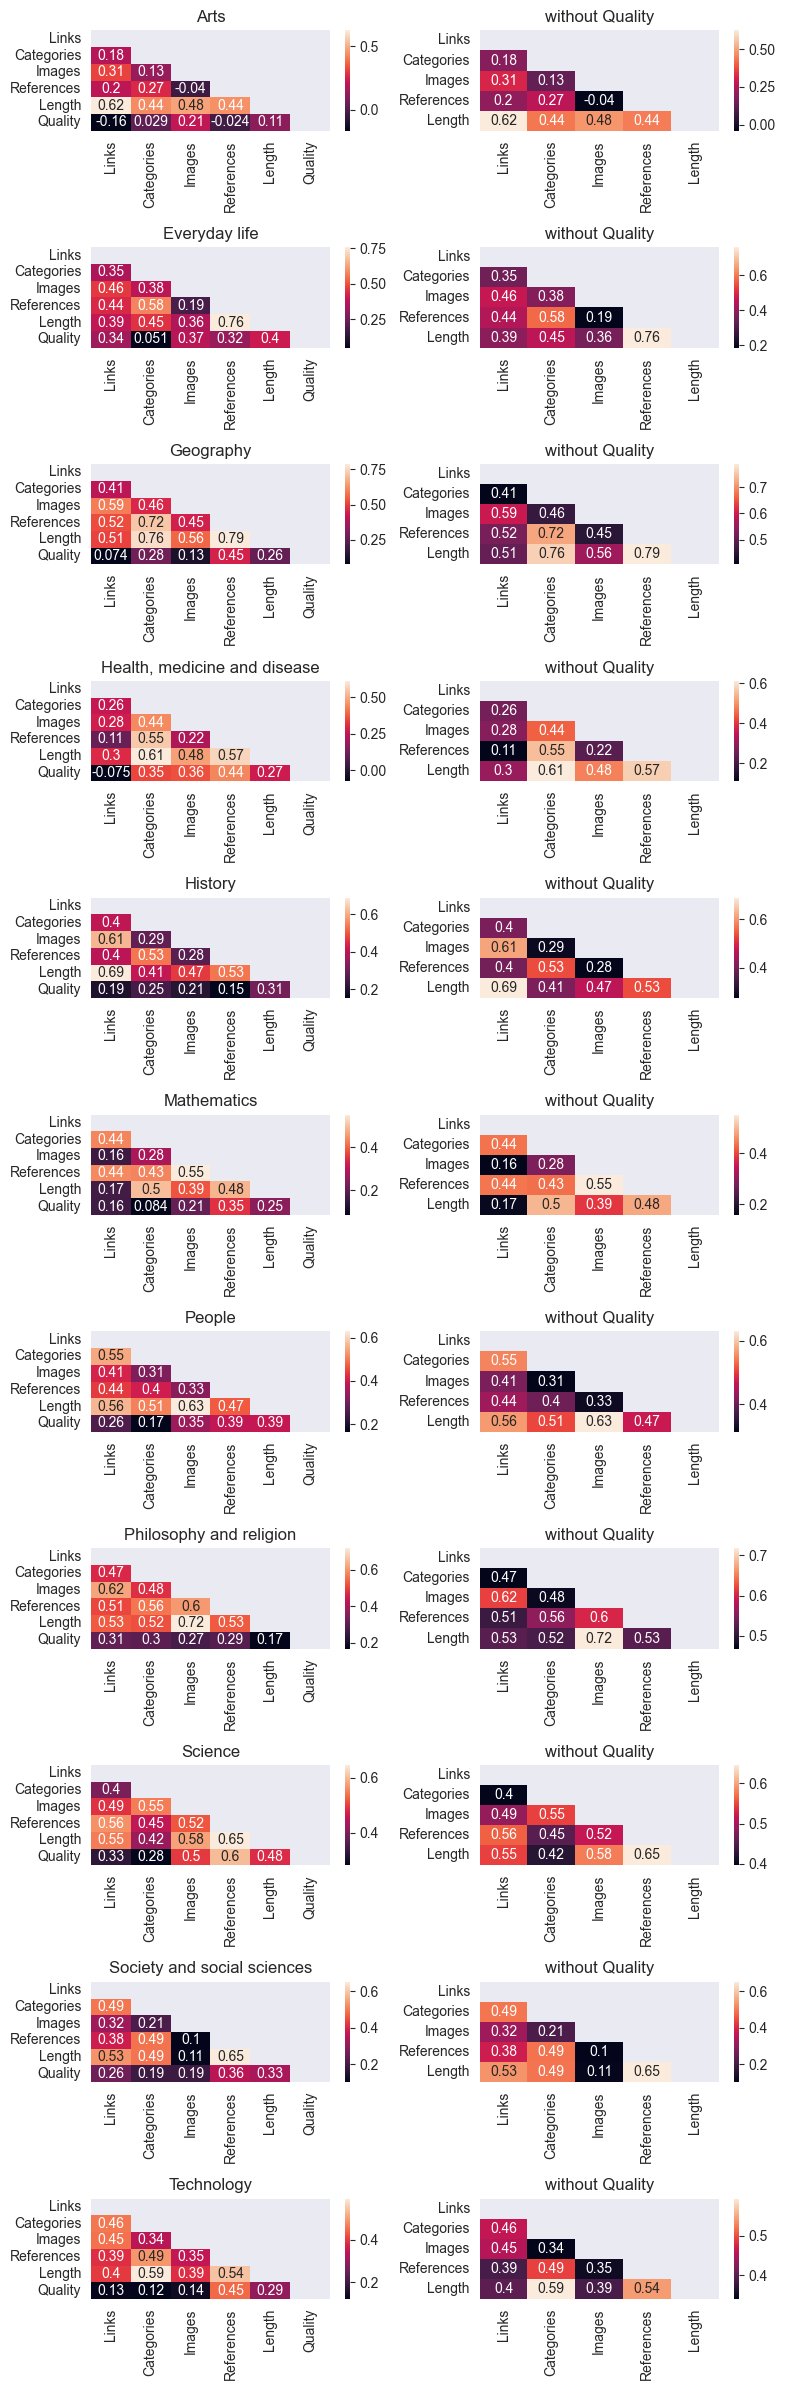

In [15]:
def corr_for_old_and_new_category(category):
    df_filtered = df.query(f"Theme == '{category}'")
    corr_within_category_for_df = df_filtered.corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr_within_category_for_df, dtype=bool))
    ax[i,0].set_title(category)
    sns.heatmap(corr_within_category_for_df, mask=mask, annot=True, ax=ax[i,0])

    df_filtered = df_without_quality.query(f"Theme == '{category}'")
    corr_within_category_for_df_filtered = df_filtered.corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr_within_category_for_df_filtered, dtype=bool))
    ax[i,1].set_title("without Quality")
    sns.heatmap(corr_within_category_for_df_filtered, mask=mask, annot=True, ax=ax[i,1])

length = len(categories)
fig, ax = plt.subplots(length,2, figsize=(8, 24))
i = 0

for category in categories:
    corr_for_old_and_new_category(category)
    i+=1

plt.tight_layout()

# Correlation with non-numerical values

In [16]:
df_all_numerical = df.copy()
df_all_numerical.head()

,Title,Links,Categories,Images,References,Length,Quality,Theme
0,Hammurabi,1103,45,44,97,15484,4.0,People
1,Hatshepsut,755,49,18,97,33266,3.0,People
2,Ramesses II,662,43,25,119,32507,2.0,People
3,Cyrus the Great,515,61,32,213,47616,2.0,People
4,Alexander the Great,1910,71,75,401,89053,4.0,People


In [17]:
i = 0
mapping = {}
for category in categories:
    mapping.update({category: i})
    i+=1

df_all_numerical["T.Numerical"] = df_all_numerical.Theme.map(mapping)
df_all_numerical.head()

,Title,Links,Categories,Images,References,Length,Quality,Theme,T.Numerical
0,Hammurabi,1103,45,44,97,15484,4.0,People,6
1,Hatshepsut,755,49,18,97,33266,3.0,People,6
2,Ramesses II,662,43,25,119,32507,2.0,People,6
3,Cyrus the Great,515,61,32,213,47616,2.0,People,6
4,Alexander the Great,1910,71,75,401,89053,4.0,People,6


In [18]:
df_all_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        998 non-null    object 
 1   Links        998 non-null    int64  
 2   Categories   998 non-null    int64  
 3   Images       998 non-null    int64  
 4   References   998 non-null    int64  
 5   Length       998 non-null    int64  
 6   Quality      997 non-null    float64
 7   Theme        998 non-null    object 
 8   T.Numerical  998 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 70.3+ KB


C:\Users\Peter\AppData\Local\Temp\ipykernel_19140\2002180551.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_all_numerical.corr()


<AxesSubplot: >

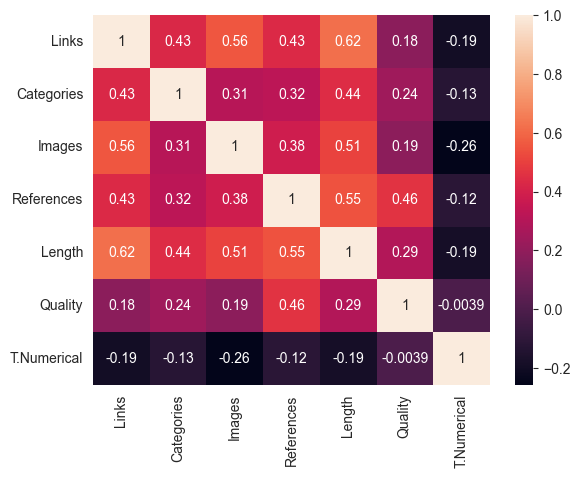

In [19]:
corr_matrix = df_all_numerical.corr()
sns.heatmap(corr_matrix, annot=True)

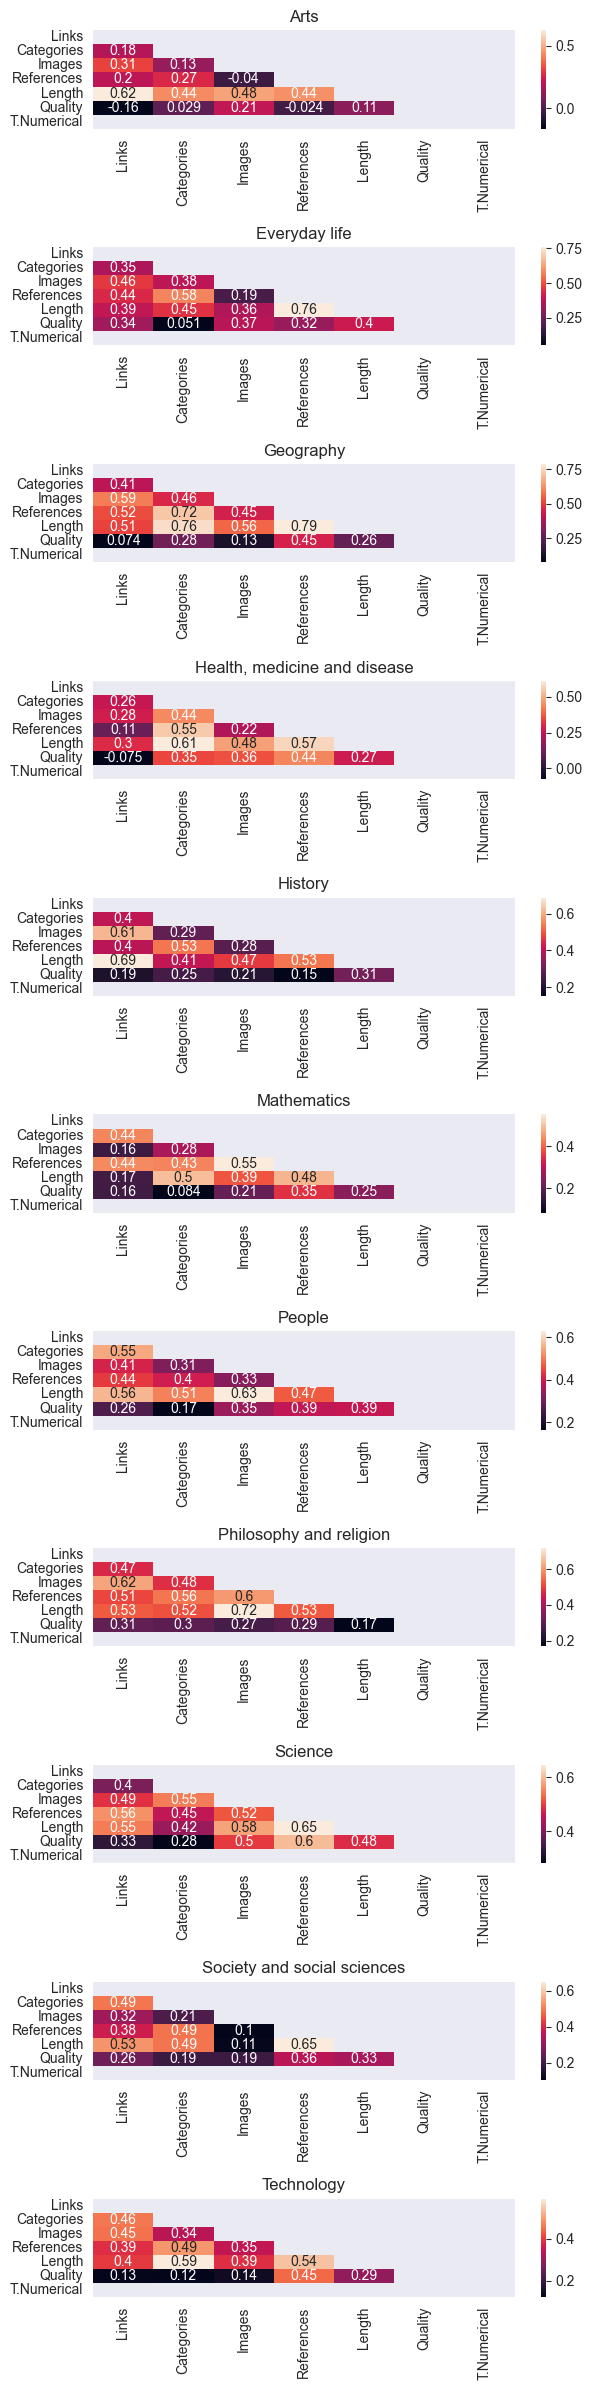

In [20]:
def corr_for_category_all_numerical(category):
    df_filtered = df_all_numerical.query(f"Theme == '{category}'")
    corr_within_category = df_filtered.corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr_within_category, dtype=bool))
    ax[i].set_title(category)
    sns.heatmap(corr_within_category, mask=mask, annot=True, ax=ax[i])

length = len(categories)
fig, ax = plt.subplots(length,1, figsize=(6.4, 24))
i = 0

# plt.figure(figsize=(6.4, 24))
for category in categories:
    corr_for_category_all_numerical(category)
    i+=1

plt.tight_layout()

# Standardization
### Before standardization

In [21]:
df_all_numerical.head()

,Title,Links,Categories,Images,References,Length,Quality,Theme,T.Numerical
0,Hammurabi,1103,45,44,97,15484,4.0,People,6
1,Hatshepsut,755,49,18,97,33266,3.0,People,6
2,Ramesses II,662,43,25,119,32507,2.0,People,6
3,Cyrus the Great,515,61,32,213,47616,2.0,People,6
4,Alexander the Great,1910,71,75,401,89053,4.0,People,6


### Z-score normalization or standardization

In [22]:
numerical_attributes = ["Links", "Categories", "Images", "References", "Length", "Quality", "T.Numerical"]
standardized_df = df_all_numerical.copy()
standardized_df[numerical_attributes] = (df_all_numerical[numerical_attributes]-df_all_numerical[numerical_attributes].mean())/df_all_numerical[numerical_attributes].std()
standardized_df.head()

,Title,Links,Categories,Images,References,Length,Quality,Theme,T.Numerical
0,Hammurabi,0.473815,0.269476,0.070467,-0.667763,-1.348138,1.303294,People,0.00263
1,Hatshepsut,-0.204377,0.425903,-0.624242,-0.667763,-0.659901,0.261286,People,0.00263
2,Ramesses II,-0.385617,0.191263,-0.437205,-0.546364,-0.689278,-0.780722,People,0.00263
3,Cyrus the Great,-0.672095,0.895185,-0.250168,-0.027662,-0.104497,-0.780722,People,0.00263
4,Alexander the Great,2.046517,1.286253,0.898774,1.009741,1.499285,1.303294,People,0.00263


### Min-max scaling or normalization

In [23]:
# Normalized to a min value of 0 and max value of 1
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
normalized_df = df_all_numerical.copy()
normalized_df[numerical_attributes] = min_max_scaler.fit_transform(normalized_df[numerical_attributes])
normalized_df.head()

,Title,Links,Categories,Images,References,Length,Quality,Theme,T.Numerical
0,Hammurabi,0.281785,0.260274,0.124629,0.069785,0.053120,0.75,People,0.6
1,Hatshepsut,0.184115,0.287671,0.047478,0.069785,0.165076,0.50,People,0.6
2,Ramesses II,0.158013,0.246575,0.068249,0.086656,0.160297,0.25,People,0.6
3,Cyrus the Great,0.116756,0.369863,0.089021,0.158742,0.255424,0.25,People,0.6
4,Alexander the Great,0.508280,0.438356,0.216617,0.302914,0.516313,0.75,People,0.6
